<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset2_pattern-mining/patternming/notebooks/dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/2025 Data Science Project/원핫인코딩_결측치가 포함된 모든 행 제거.csv'

data = pd.read_csv(file_path, encoding="utf-8")

# 불러온 csv 파일 읽기
print(data.head())

   YEAR       AGE  EDUC  GENDER  SPHSERVICE  CMPSERVICE  OPISERVICE  \
0  2022  0.461538  0.50       1           0           1           0   
1  2022  1.000000  0.75       0           1           1           0   
2  2022  0.615385  1.00       0           0           1           1   
3  2022  0.615385  1.00       0           0           1           1   
4  2022  0.846154  0.50       0           0           1           0   

   RTCSERVICE  IJSSERVICE  MH1  ...  LIVARAG_3  DIVISION_1  DIVISION_2  \
0           0           0    7  ...      False       False       False   
1           0           0   11  ...       True       False       False   
2           0           0    7  ...      False       False       False   
3           0           0    7  ...      False       False       False   
4           0           0    6  ...      False       False       False   

   DIVISION_3  DIVISION_4  DIVISION_5  DIVISION_6  DIVISION_7  DIVISION_8  \
0       False       False       False        True  

In [1]:
import pandas as pd
data = pd.read_csv('/content/원핫인코딩_결측치가 포함된 모든 행 제거.csv')

# **STEP1: 질환 간의 동시 발생 패턴 탐색**
예: "우울증이 있는 사람은 불안장애도 함께 겪는 경우가 많다"

방법: FP-Growth로 질환 간 조합 찾기**

- **사용 칼럼**: TRAUSTRE, ANXIETY, ADHD, CONDUCT, DELIRDEM, BIPOLAR, DEPRESS, ODD, PDD, PERSON, SCHIZO, ALCSUB, OTHERDIS, SUB.
- **이유**: 이 변수들은 질병의 존재 여부를 나타내며, 질환 간 동시 발생 패턴(예: DEPRESS와 ANXIETY의 조합)을 찾는 데 적합.





---



In [9]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# 1. 결측값이 있는 행 제거
data_cleaned = data.dropna()

# 2. 질병 변수만 추출
disease_columns = ['TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'SUB_1', 'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9', 'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13']
disease_data = data_cleaned[disease_columns]

# FP-Growth 알고리즘 적용하여 자주 등장하는 항목 집합 찾기
#너무 희귀한 변수 제거
selected_columns = disease_data.columns[disease_data.sum() >= 5000]
disease_data_filtered = disease_data[selected_columns]
# 3. minimum support: 0.01 -> 안들어가는 변수가 있어서 0.005로 변경
frequent_itemsets = fpgrowth(disease_data_filtered, min_support=0.005, use_colnames=True)

# 4. minimum lift(향상도) 1.2 이상인 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# 5. 결과 출력
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support                  itemsets
0   0.350759              (DEPRESSFLG)
1   0.159832               (SCHIZOFLG)
2   0.240187              (ANXIETYFLG)
3   0.190046             (TRAUSTREFLG)
4   0.015345                  (SUB_11)
..       ...                       ...
69  0.018815   (ALCSUBFLG, DEPRESSFLG)
70  0.012218   (ALCSUBFLG, ANXIETYFLG)
71  0.011109  (TRAUSTREFLG, ALCSUBFLG)
72  0.011383    (SCHIZOFLG, ALCSUBFLG)
73  0.011185   (ALCSUBFLG, BIPOLARFLG)

[74 rows x 2 columns]

Association Rules:
                  antecedents                consequents  antecedent support  \
0   (TRAUSTREFLG, DEPRESSFLG)               (ANXIETYFLG)            0.053054   
1   (TRAUSTREFLG, ANXIETYFLG)               (DEPRESSFLG)            0.035378   
2                (DEPRESSFLG)  (TRAUSTREFLG, ANXIETYFLG)            0.350759   
3                (ANXIETYFLG)  (TRAUSTREFLG, DEPRESSFLG)            0.240187   
4                     (SUB_8)               (BIPOLARFLG)            0.

# FP-Growth 분석 결과 확인

**빈번한 질환 조합 (Frequent Itemsets)**
  (최소 지지도(1%) 이상인 조합들만 나열함)

- 가장 빈번한 단일 질환: DEPRESSFLG (우울증 관련 질환)이 35.08%의 지지도(support)로 가장 자주 나타남
- 주요 2개 조합: DEPRESSFLG와 ANXIETYFLG (불안 관련 질환)의 조합이 9.84%로 가장 흔한 쌍임
- 3개 조합: DEPRESSFLG, TRAUSTREFLG (외상 관련 질환), ANXIETYFLG가 1.61%의 지지도를 보임

**연관 규칙 (Association Rules)**
  (모든 규칙은 리프트 1.2 이상으로 필터링되어, 의미 있는 연관성만 포함함)
- 규칙 1: DEPRESSFLG와 TRAUSTREFLG가 있을 때 ANXIETYFLG가 나타날 확률(confidence)은 30.39%, 리프트(lift)는 1.27로 양의 상관관계를 보임
- 규칙 2: TRAUSTREFLG와 ANXIETYFLG가 있을 때 DEPRESSFLG가 나타날 확률은 45.58%, 리프트는 1.30으로 강한 연관성을 시사함

**CONCLUSION: DEPRESSFLG, ANXIETYFLG, TRAUSTREFLG 같은 질환들이 자주 함께 나타남**



---
# **STEP 2: 질환+배경 변수의 연관 규칙**
 **사용 칼럼**:
 - 질환: 위와 동일
 - 배경: (AGE, EDUC)순서형이라서 생략, ETHNIC, RACE, GENDER, MARSTAT, SMISED, SAP, EMPLOY, DETNLF, VETERAN, LIVARAG.

- **이유**: 질환과 배경 변수 간 연관성을 찾기 위해 모두 포함(예: "DEPRESS + EMPLOY=실업 → PTSD").
- **방법**: FP-Growth

In [29]:
# 1. 결측값이 있는 행 제거
data_cleaned = data.dropna()

# 2. 배경 변수 추출
background_columns = [
    "GENDER", "SPHSERVICE", "CMPSERVICE", "OPISERVICE", "RTCSERVICE", "IJSSERVICE",
    "RACE_2", "RACE_3", "RACE_4", "RACE_5", "RACE_6",
    "ETHNIC_2", "ETHNIC_3", "ETHNIC_4",
    "MARSTAT_2", "MARSTAT_3", "MARSTAT_4",
    "SMISED_2", "SMISED_3",
    "DETNLF_2", "DETNLF_3", "DETNLF_4", "DETNLF_5", "DETNLF_NotApplicable",
    "LIVARAG_2", "LIVARAG_3"
]

background_data = data_cleaned[background_columns]

# Combine all columns
all_columns = list(disease_data.columns) + list(background_data.columns)

# Extract relevant data
data_all = data_cleaned[all_columns]
data_all = (data_all > 0).astype(bool)

# Check for NaN values
print("NaN counts before processing:")
print(data_all.isna().sum())


# NaN 은 0 대체
data_all = data_all.fillna(0)

# Verify no NaN values remain
print("\nNaN counts after processing:")
print(data_all.isna().sum())

# Check number of rows
print("\nNumber of rows in data_all:", len(data_all))

# Ensure data is binary
print("\nUnique values in each column:")
for col in data_all.columns:
    print(f"{col}: {data_all[col].unique()}")

# Apply FP-Growth
if len(data_all) > 0:
    frequent_itemsets = fpgrowth(data_all, min_support=0.01, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

    # Filter rules
    disease_to_background_rules = rules[rules['antecedents'].apply(lambda x: any(item in disease_columns for item in x)) &
                                        rules['consequents'].apply(lambda x: any(item in background_columns for item in x))]
    background_to_disease_rules = rules[rules['antecedents'].apply(lambda x: any(item in background_columns for item in x)) &
                                        rules['consequents'].apply(lambda x: any(item in disease_columns for item in x))]

    # Output results
    print("\nDisease to Background Rules:")
    print(disease_to_background_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    print("\nBackground to Disease Rules:")
    print(background_to_disease_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    # Save rules
    disease_to_background_rules.to_csv('disease_to_background_rules.csv', index=False)
    background_to_disease_rules.to_csv('background_to_disease_rules.csv', index=False)
else:
    print("Error: DataFrame is empty after processing.")



NaN counts before processing:
TRAUSTREFLG             0
ANXIETYFLG              0
ADHDFLG                 0
CONDUCTFLG              0
DELIRDEMFLG             0
BIPOLARFLG              0
DEPRESSFLG              0
ODDFLG                  0
PDDFLG                  0
PERSONFLG               0
SCHIZOFLG               0
ALCSUBFLG               0
OTHERDISFLG             0
SUB_1                   0
SUB_2                   0
SUB_3                   0
SUB_4                   0
SUB_5                   0
SUB_6                   0
SUB_7                   0
SUB_8                   0
SUB_9                   0
SUB_10                  0
SUB_11                  0
SUB_12                  0
SUB_13                  0
GENDER                  0
SPHSERVICE              0
CMPSERVICE              0
OPISERVICE              0
RTCSERVICE              0
IJSSERVICE              0
RACE_2                  0
RACE_3                  0
RACE_4                  0
RACE_5                  0
RACE_6                  0
ETHNIC_2

KeyboardInterrupt: 

# step 2에서 결측치 때문에 계속 오류가 나는데 아직 왜 그런지 정확하게 파악을 못했어요 그래서 여기서 부터 밑에 까지는 아직 결과 분석을 step 1 처럼 정리 못했음

# **Step 3: 전략 B - 질환 행렬로 K-Means 클러스터링**

- **사용 데이터**: disease data
- **이유**: 질환 행렬(바이너리 데이터)을 사용해 환자를 질병 프로필로 군집화.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

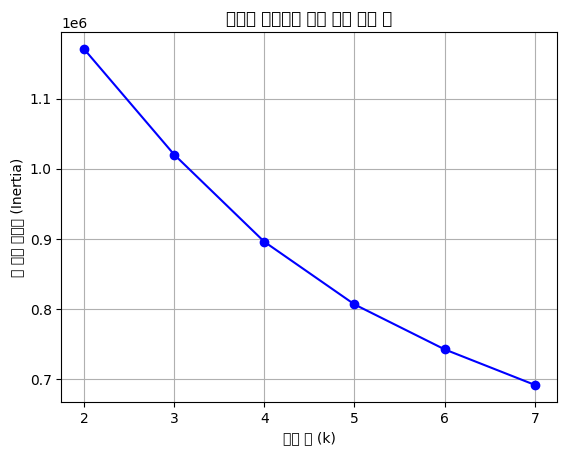

In [33]:
import matplotlib.pyplot as plt

# 엘보우 메소드로 최적 군집 수 찾기
inertia = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(disease_data)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('(k)')
plt.ylabel(' (Inertia)')
plt.title('cluster num')
plt.grid(True)
plt.show()


In [34]:
import pandas as pd
from sklearn.cluster import KMeans

n_clusters=4
# K-평균 클러스터링 실행 (초기 클러스터 개수는 5개, 데이터에 따라 조정 가능)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(disease_data)

# 클러스터 레이블을 데이터프레임에 추가
data['cluster'] = clusters

# 각 클러스터별 질병 변수의 평균으로 요약
cluster_summary = data.groupby('cluster')[disease_columns].mean()
print("Cluster Summary (Mean of Disease Variables):")
print(cluster_summary)

# 클러스터 레이블이 포함된 데이터프레임 저장n_clusters = 4
data.to_csv('clustered_data.csv', index=False)

Cluster Summary (Mean of Disease Variables):
         TRAUSTREFLG  ANXIETYFLG   ADHDFLG  CONDUCTFLG  DELIRDEMFLG  \
cluster                                                               
0           0.291985    0.281401  0.081113    0.013187     0.004385   
1           0.150272    0.293254  0.033993    0.001979     0.002143   
2           0.067744    0.085503  0.015198    0.001986     0.005161   
3           0.164416    0.185364  0.051239    0.002614     0.002121   

         BIPOLARFLG  DEPRESSFLG    ODDFLG    PDDFLG  PERSONFLG  ...     SUB_4  \
cluster                                                         ...             
0          0.000000    0.000000  0.014901  0.032610   0.027787  ...  0.030491   
1          0.009419    1.000000  0.002974  0.005925   0.032951  ...  0.050392   
2          0.029526    0.051603  0.001177  0.009167   0.037114  ...  0.040640   
3          1.000000    0.048046  0.002917  0.008012   0.062380  ...  0.053136   

            SUB_5     SUB_6     SUB_7    

### 클러스터 설명

- **Cluster 0 (35.82% 외상 관련 질환 비율, ADHD 8.80%)**
  TRAUSTREFLG (외상): 29.2%

  ANXIETYFLG (불안): 28.1%

  ADHDFLG: 8.1%, PDDFLG: 3.3%, PERSONFLG: 2.8%

  DEPRESSION = 0%, BIPOLAR = 0%

  약물사용(SUB 계열): 전반적으로 낮음 (예: SUB_7: 2.6% )

  → 정서장애(우울, 조울증)는 없지만, 외상/불안/주의력 문제가 혼재된 행동/외상 기반 클러스터

- **Cluster 1 (우울 + 불안 혼합군, 100% 우울, 29.3% 불안)**
  DEPRESSION = 100% → 우울증 플래그가 전원에게 있음

  ANXIETY = 29.3%, TRAUSTREFLG = 15.0%

  물질 사용률 전체적으로 높음 (SUB_4SUB_9: 25%)

  양극성(BIPOLAR) 비율은 0.9% 정도

  → 전형적인 우울증 중심 정서 장애군, 일부 불안과 외상 동반
  → 물질 사용 경향도 있음

- **Cluster 2 (가장 경미한 군, 전반적으로 낮은 비율)**
  DEPRESSION = 5.1%, ANXIETY = 8.6%, TRAUSTREFLG = 6.8%

  기타 정신질환 모두 1~3% 이하

  물질 사용도 전반적으로 낮음 (SUB_7 = 1.4%)

  → 경증 정신질환 또는 일반 집단에 가까운 안정된 클러스터

- **Cluster 3 (100% BIPOLAR, 일부 DEPRESS)**
  BIPOLAR = 100%

  DEPRESSION = 4.8%, PERSONFLG (성격장애): 6.2%

  물질 사용율 높은 편 (SUB_7 = 3.6%, SUB_8 = 3.2%, SUB_11 = 2.2%)

  → 조울증 중심의 특이 클러스터, 일부 조현병/성격장애 병합


###결론 (Conclusion)
|클러스터	|핵심 특징	요약 해석|
|------------|-------------|
|Cluster 0	|외상(29%), 불안(28%), ADHD(8%) / 우울증 없음	정서장애가 없는 행동·외상 문제군. 발달 문제 일부 포함, 중독 경향 낮음|
|Cluster 1	|우울증 100%, 불안(29%), 외상(15%) / 중독 플래그도 다소 높음	우울증 중심 정서장애군, 불안과 외상이 일부 병합. 물질 사용 위험도 있음|
|Cluster 2	|모든 질환 비율 5% 이하 / 외상, 불안, 중독 낮음	경증 또는 일반군. 전반적으로 건강하며, 중재보다는 예방 중심 전략 적합|
|Cluster 3	|조울증 100%, 성격장애(6.2%), 일부 우울증 및 중독 경향	조울증 고위험군, 다중 병합 가능성. 성격 문제 및 중독 플래그 함께 존재|

# **Step 4: 전략 B - 클러스터별 배경 조건 확인**

- **사용 칼럼**: AGE, EDUC, ETHNIC, RACE, GENDER, MARSTAT, SMISED, SAP, EMPLOY, DETNLF, VETERAN, LIVARAG.
- **방법 제안**:
    - 클러스터별로 배경 변수의 분포를 계산(예: 평균 AGE, EMPLOY 상태 비율).
    - 시각화(막대그래프, 히스토그램)로 각 클러스터의 배경 특성 비교.
    - 통계 검정(카이제곱, t-검정)으로 클러스터 간 차이 확인 가능.
- **이유**: 질병 기반 클러스터에서 배경 변수의 패턴을 역으로 탐색.

In [45]:
# 클러스터별 배경 변수의 비율 분석
print("Background Variable Proportions by Cluster:")
for col in background_columns:
    cluster_col_summary = data.groupby('cluster')[col].mean()
    print(f"\nProportion of {col} in each cluster:")
    print(cluster_col_summary)


with open('cluster_background_summary.txt', 'w') as f:
    for col in background_columns:
        cluster_col_summary = data.groupby('cluster')[col].mean()
        f.write(f"\nProportion of {col} in each cluster:\n{cluster_col_summary}\n")

Background Variable Proportions by Cluster:

Proportion of GENDER in each cluster:
cluster
0    0.476000
1    0.384489
2    0.628539
3    0.390399
Name: GENDER, dtype: float64

Proportion of SPHSERVICE in each cluster:
cluster
0    0.003576
1    0.005117
2    0.019695
3    0.007623
Name: SPHSERVICE, dtype: float64

Proportion of CMPSERVICE in each cluster:
cluster
0    0.966872
1    0.951717
2    0.938599
3    0.956625
Name: CMPSERVICE, dtype: float64

Proportion of OPISERVICE in each cluster:
cluster
0    0.052791
1    0.066721
2    0.101862
3    0.068805
Name: OPISERVICE, dtype: float64

Proportion of RTCSERVICE in each cluster:
cluster
0    0.013300
1    0.008128
2    0.020013
3    0.010420
Name: RTCSERVICE, dtype: float64

Proportion of IJSSERVICE in each cluster:
cluster
0    0.002620
1    0.001177
2    0.002126
3    0.001462
Name: IJSSERVICE, dtype: float64

Proportion of RACE_2 in each cluster:
cluster
0    0.009775
1    0.008162
2    0.011488
3    0.006115
Name: RACE_2, dtype: 

## 결과 해석

### 설명

**Cluster 0 사회적 문제, 장애, 독립 거주가 복합된 취약군**
  - 정신사회적 문제(SMISED_3): 41.8% → 가장 높음

  - 장애로 인한 비경제활동(DETNLF_2): 14.4% → 매우 높음
  
  - 독립 생활(LIVARAG_2): 89.4%


**Cluster 1 여성 중심의 정서 문제군 (우울·불안과 잘 맞음)**
  - 여성 비율 가장 높음 (남성 38.4%)

  - 서비스 이용(CMPSERVICE): 95.2%

  - OPISERVICE: 6.6% → 외래서비스도 이용

  - 거주 안정(LIVARAG_2): 90.8%

  - 혼인 상태(MARSTAT_4 – 이혼/사별): 18.7%

**Cluster 2 고연령, 남성, 은퇴자 중심의 경증군**
  - AGE: 0.64 → 가장 연령 높음

  - 남성 비율: 62.8% → 가장 높은 남성 비율

  - 정신사회적 문제(SMISED_3): 11.3% → 가장 낮음

  - 특수 서비스 이용(SPHSERVICE): 1.97% → 가장 높음

**Cluster 3 조울증 중심의 여성 고위험군과 유사**
  - EDUC: 0.750 → 교육 수준 가장 높음

  - 혼인 상태(MARSTAT_4): 20.9% → 가장 높음

  - 여성 중심 (남성 39.0%)
  
  - 서비스 이용률 전반적으로 높음

    - CMPSERVICE: 95.7%

    - OPISERVICE: 6.9%
  
  - 인종(RACE_5): 71.4% → 가장 높음


### 최종 요약: 배경 기반 클러스터 비교표

| Cluster	| 핵심 프로파일 요약 |
|---------|---------------------|
|0	| 사회문제 및 장애 비율 높음, 서비스 접근 낮고 행동/발달 문제 중심 |
|1	| 여성 중심, 이혼/사별 경험 많은 정서군, 주거 안정적 |
|2	| 고령 남성, 퇴직자 많고 주거 불안정, 서비스 수요 높음 |
|3	| 조울증 중심군, 성별 불균형, 관계 상실 위험 높음 |


## 클러스터 별 시각화

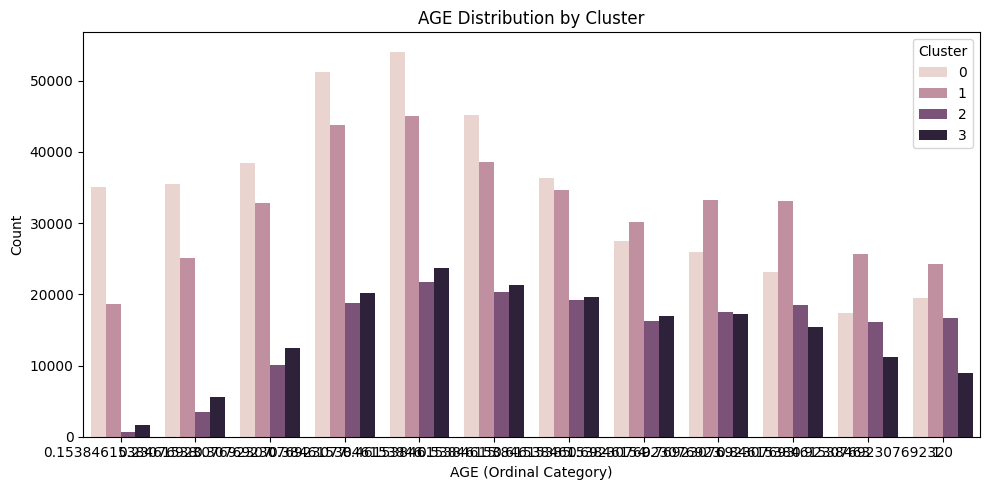

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='AGE', hue='cluster')
plt.title('AGE Distribution by Cluster')
plt.xlabel('AGE (Ordinal Category)')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

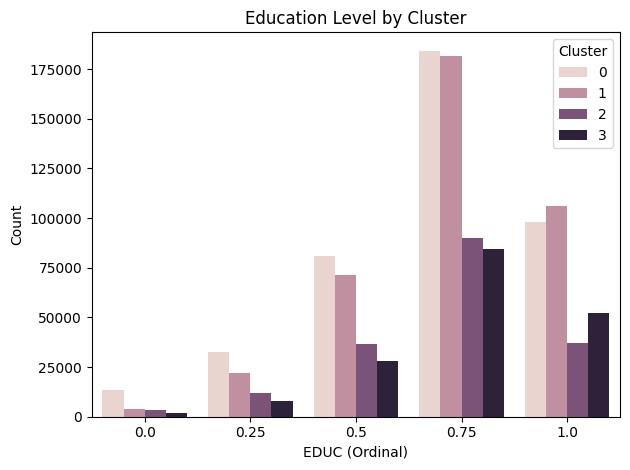

In [40]:
# EDUC (ordinal, 예: 1=초등, 2=중등, ... 7=대학원 등)
sns.countplot(data=data, x='EDUC', hue='cluster')
plt.title('Education Level by Cluster')
plt.xlabel('EDUC (Ordinal)')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


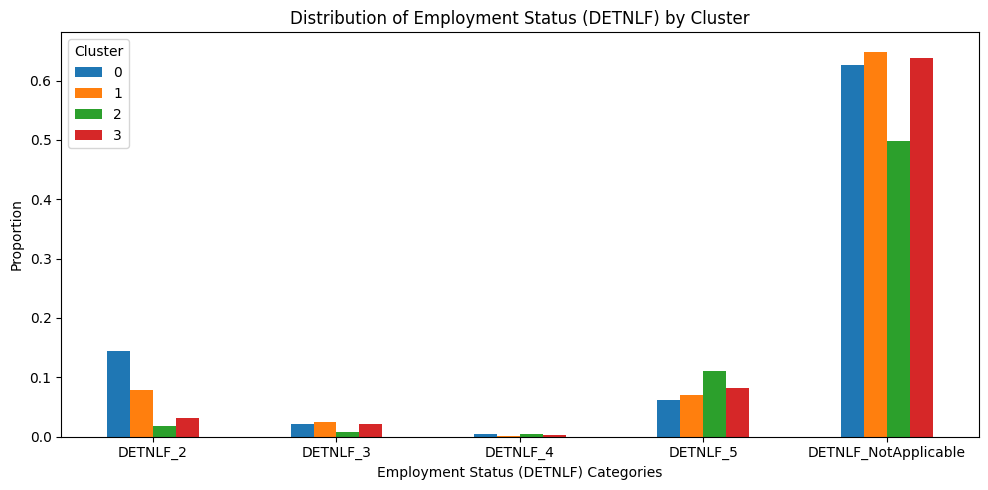

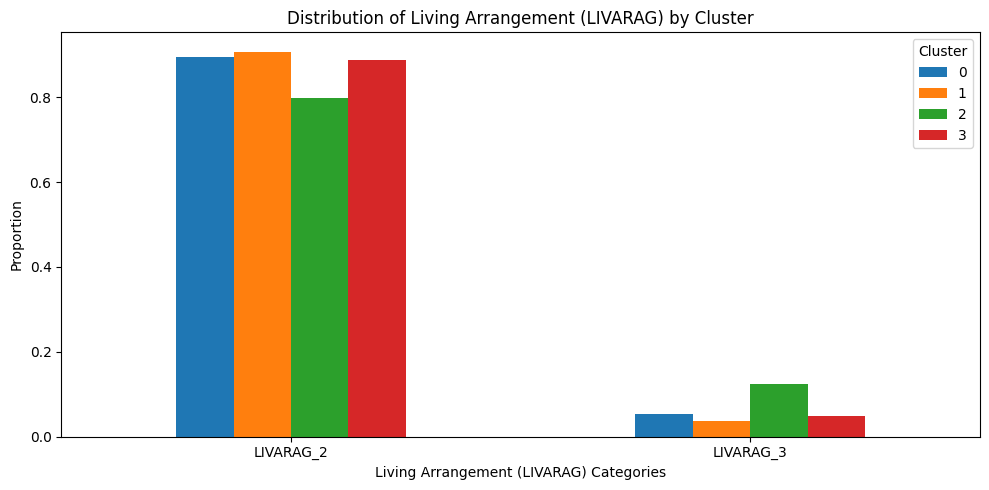

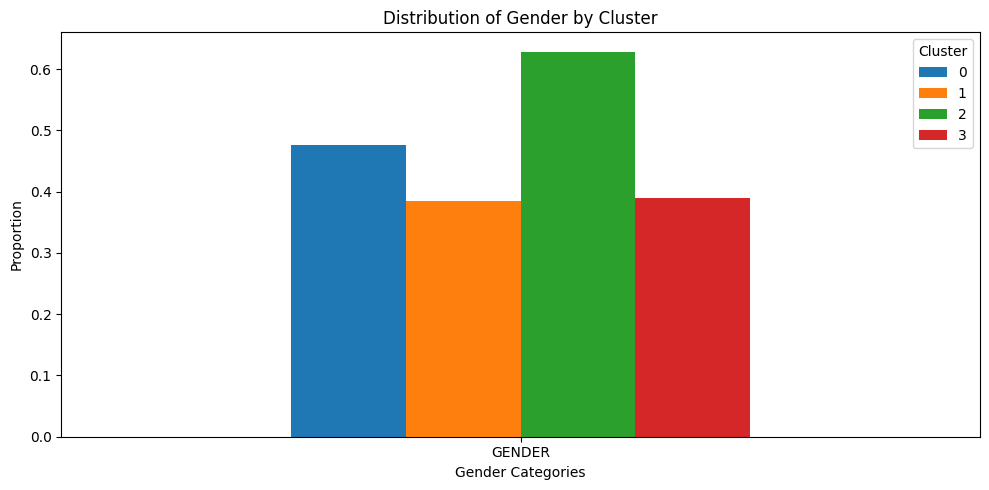

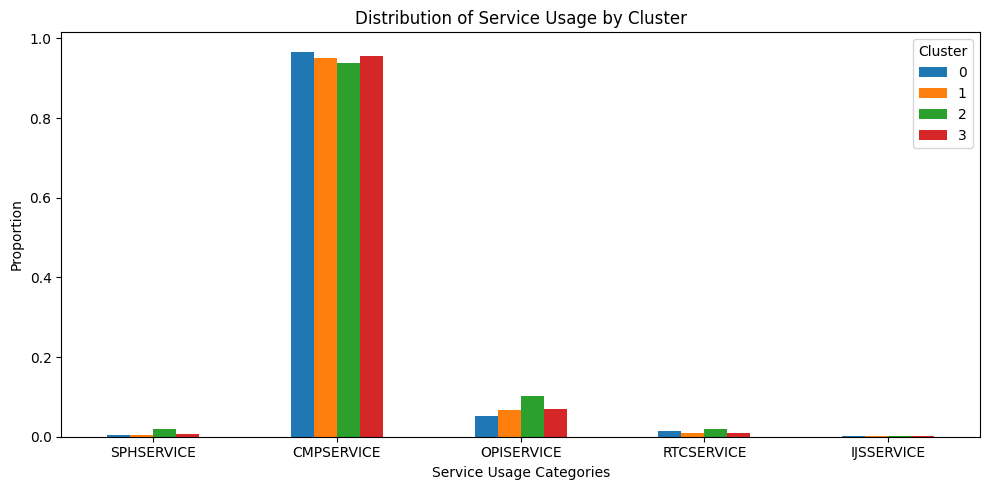

In [44]:
# Cluster-wise distribution of categorical variables (proportions)
variable_groups = {
    "Employment Status (DETNLF)": ['DETNLF_2', 'DETNLF_3', 'DETNLF_4', 'DETNLF_5', 'DETNLF_NotApplicable'],
    "Living Arrangement (LIVARAG)": ['LIVARAG_2', 'LIVARAG_3'],
    "Gender": ['GENDER'],
    "Service Usage": ['SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE']
}

for var_group_name, columns in variable_groups.items():
    dist = data.groupby('cluster')[columns].mean().T
    dist.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Distribution of {var_group_name} by Cluster')
    plt.ylabel('Proportion')
    plt.xlabel(f'{var_group_name} Categories')
    plt.xticks(rotation=0)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()


# **Step 5: 전략 A와 B 비교**

- **사용 칼럼**: Step 2와 Step 3~4의 결과 활용.
- **방법**:
    - 전략 A(연관 규칙)에서 찾은 조합(예: DEPRESS+무직 → PTSD)과 전략 B(클러스터)의 질병+배경 패턴을 비교.
    - 일치 여부는 공통된 질병 조합과 배경 변수의 유사성으로 판단.

In [ ]:
# 클러스터 요약 정보 다시 계산
cluster_summary = data.groupby('cluster')[disease_columns].mean()

# 예시 비교: DEPRESSFLG와 ANXIETYFLG 값이 높은 클러스터가 SMISED_2와 관련된 연관 규칙과 일치하는지 확인
print("Comparing Strategy A (Rules) with Strategy B (Clusters):")
high_depress_anxiety_clusters = cluster_summary[(cluster_summary['DEPRESSFLG'] > 0.5) & (cluster_summary['ANXIETYFLG'] > 0.5)].index

if not high_depress_anxiety_clusters.empty:
    print("\nClusters with high DEPRESSFLG and ANXIETYFLG:")
    for cluster in high_depress_anxiety_clusters:
        smised_2_proportion = data[data['cluster'] == cluster]['SMISED_2'].mean()
        print(f"Cluster {cluster}: Proportion of SMISED_2 = {smised_2_proportion}")
else:
    print("\nNo clusters found with high DEPRESSFLG and ANXIETYFLG.")

# 전략 A에서 생성된 규칙 중 이 패턴과 일치하는 것이 있는지 확인
relevant_rules = background_to_disease_rules[
    background_to_disease_rules['antecedents'].str.contains('SMISED_2') &
    background_to_disease_rules['consequents'].str.contains('DEPRESSFLG|ANXIETYFLG')
]
print("\nRelevant Rules from Strategy A (SMISED_2 -> DEPRESSFLG or ANXIETYFLG):")
if not relevant_rules.empty:
    print(relevant_rules[['antecedents', 'consequents', 'lift']])
else:
    print("No matching rules found.")